### Treść zadania

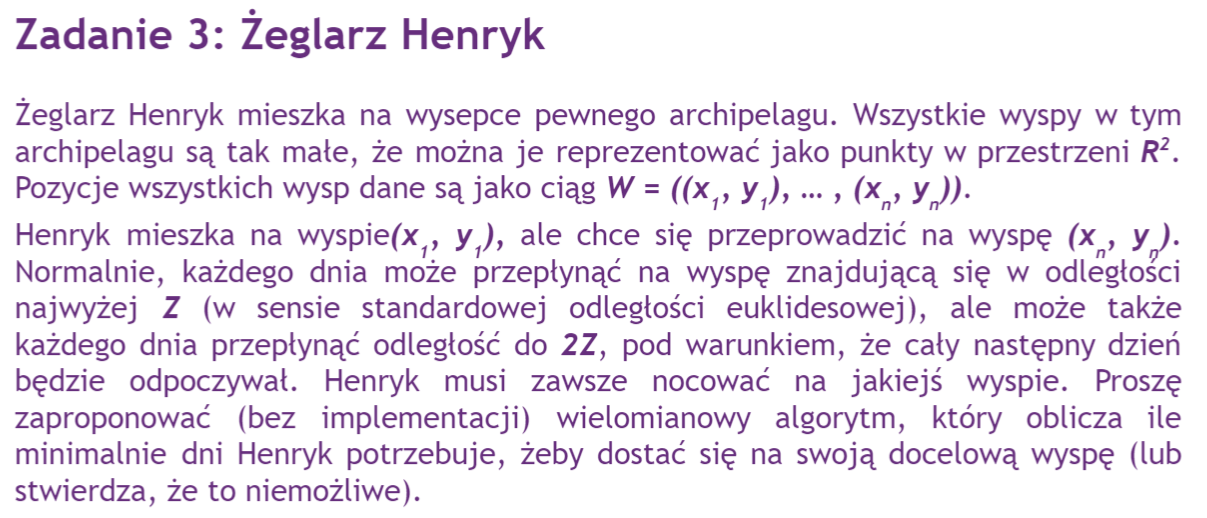

# Sposób I
### Z dzieleniem krawędzi na kilka
##### (Gorszy sposób, bo da się to zrobić sporo łatwiej bez fizycznego tworzenia grafu w ten sposób)

### Omówienie algorytmu

Najłatwiejszym rozwiązaniem jest stworzenie grafu, w którym wierzchołkami będą wyspy, a krawędzie będą znajdowały się jedynie między tymi wyspami, do których żeglaż jest w stanie dotrzeć. Skorzystamy z powielania wierzchołków, w przypadku krawędzi do dalszych wysp, ale dokładniej:
- Jeżeli dana wyspa znajduje się w odlełości nie większej niż $ Z $, łączymy ją krawędzią bezpośrednio z bieżącą wyspą (innymi słowy, finalnie dana wyspa zostanie połączona ze wszystkimi wyspami w odległości nieprzekraczającej $ Z $),
- Jeżeli dana wyspa znajduje się w odlełgości $ d $ takiej, że $ Z \lt d \le 2Z $, połączymy daną wyspę do obecnej, przy pomocy dwóch krawędzi, tj, ścieżki długości 2 (dodamy fantomowy wierzchołek, do którego przyłączymy pojedynczą krawędzią bieżącą wyspę oraz pojedynczą krawędzią wyspę w zasięgu $ Z \lt d \le 2Z $). 

<br>
Chodzi mniej więcej o to:

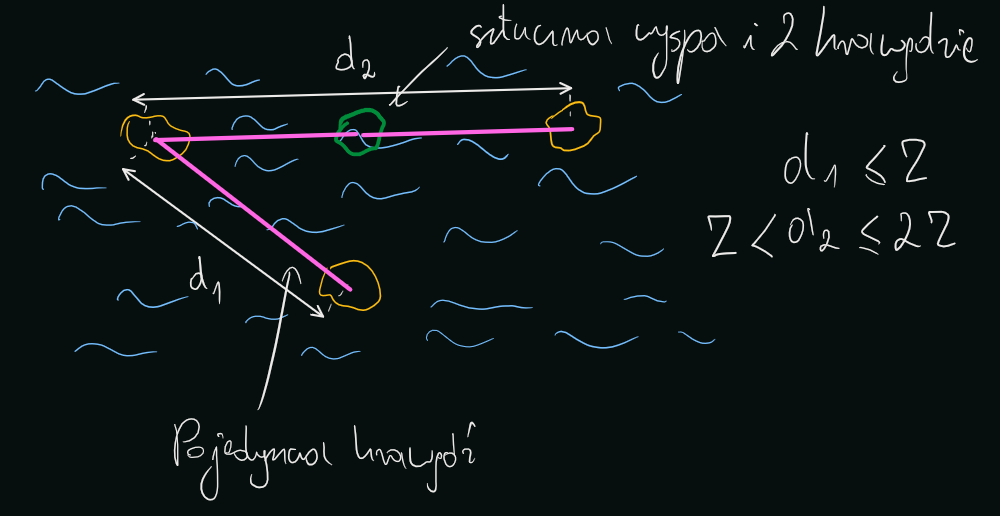
<br>
Taka imitacja dwóch wysp pozwoli nam na łatwiejsze uwzględnienie przypadku takiego, że Henryk musi odpocząć cały dzień, a więc możemy po prostu ten przypadek zlekceważyć po przekształceniu grafu. Jest od tego jeden istotny wyjątek. Nie możemy tak zrobić, w przypadku, gdy dana krawędź łączy ostanią wyspę (nasz cel). Jeżeli chodzi o krawędzie odpowiadające odlełościom $ 0 \lt d \le Z $, z nimi nie ma żadnej różnicy. Chodzi natomiast o krawędzie, w których tworzymy sztucznie dodane wierzchołki. W przypadku ostatniego etapu podróży nie uwzględniamy już konieczności odpoczywania Henryka, ponieważ będzie mógł on odpocząć na wyspie docelowej, a ten czas odpoczynku, przeciwnie do wczesniejszych, nie wlicza się już do czasu podróży. Z tego powodu, każdą wyspę, która jest w odlełgości $ 0 \lt d \le 2Z $ od celu, łaczymy pojedynczą krawędzią z wyspą docelową.

### Złożoność

Dodawanie dodatkowych wierzchołków do grafu nie zmienia nam za bardzo złożoności, ponieważ maksymalnie będziemy mieli tyle wierzchołków, ile będzie krawędzi, a krawędzi może być co najwyżej $ n^2 $ (jeżeli uwzględnimy sztucznie rozdzielone krawędzie, to maksymalnie $ 2 \cdot n^2 $ krawędzi), gdzie $ n $ - liczba wysp. Samo tworzenie grafu zajmuje $ O(n^2) $ czasu, bo musimy sprawdzić każdą parę wysp osobno. Również graf może zająć $ O(n^2) $ miejsca, gdy z każdej wyspy da się dotrzeć do każdej innej.
###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

In [1]:
from queue import Queue


def distance(p1, p2):
    return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** .5

    
def add_edge(G, u, v, weight):
    if weight == 1: 
        G[u].append(v)
        G[v].append(u)
        return
    
    w = len(G)  # added w vertex index
    for _ in range(weight - 1):
        G.append([])
        G[u].append(w)
        G[w].append(u)
        u = w
        w += 1
    
    w -= 1 
    G[w].append(v)
    G[v].append(w)
    
    
def create_graph(P: 'array of islands coordinates', target: 'target island', Z: 'max distance'):
    n = len(P)
    G = [[] for _ in range(n)]
    
    # Connect each island with islands that can be rached
    for u in range(n):
        for v in range(u):
            dist = distance(P[u], P[v])
            if u == target or v == target:
                if dist <= 2 * Z: add_edge(G, u, v, 1)
            elif dist <= Z: add_edge(G, u, v, 1)
            elif dist <= 2 * Z: add_edge(G, u, v, 2)
        
    return G


def count_days(P: 'array of islands', s: 'start point', t: 'target point', Z: 'max distance'):
    if s == t: return 0
    
    # Create a graph of the islands
    G = create_graph(P, t, Z)
    n = len(G)
    
    # Find vertices representing start and end island
    start_u = end_u = -1
    for i in range(len(P)):
        if P[i] == s: start_u = i
        elif P[i] == t: end_u = i
    
    days = [-1] * n
    days[start_u] = 0
    q = Queue()
    q.put(start_u)
    
    while not q.empty():
        u = q.get()
        if u == end_u: return days[end_u]
        for v in G[u]:
            # Visit if not visited
            if days[v] < 0:
                days[v] = days[u] + 1
                q.put(v)
                
    return -1  # If impossible

###### Kilka testów

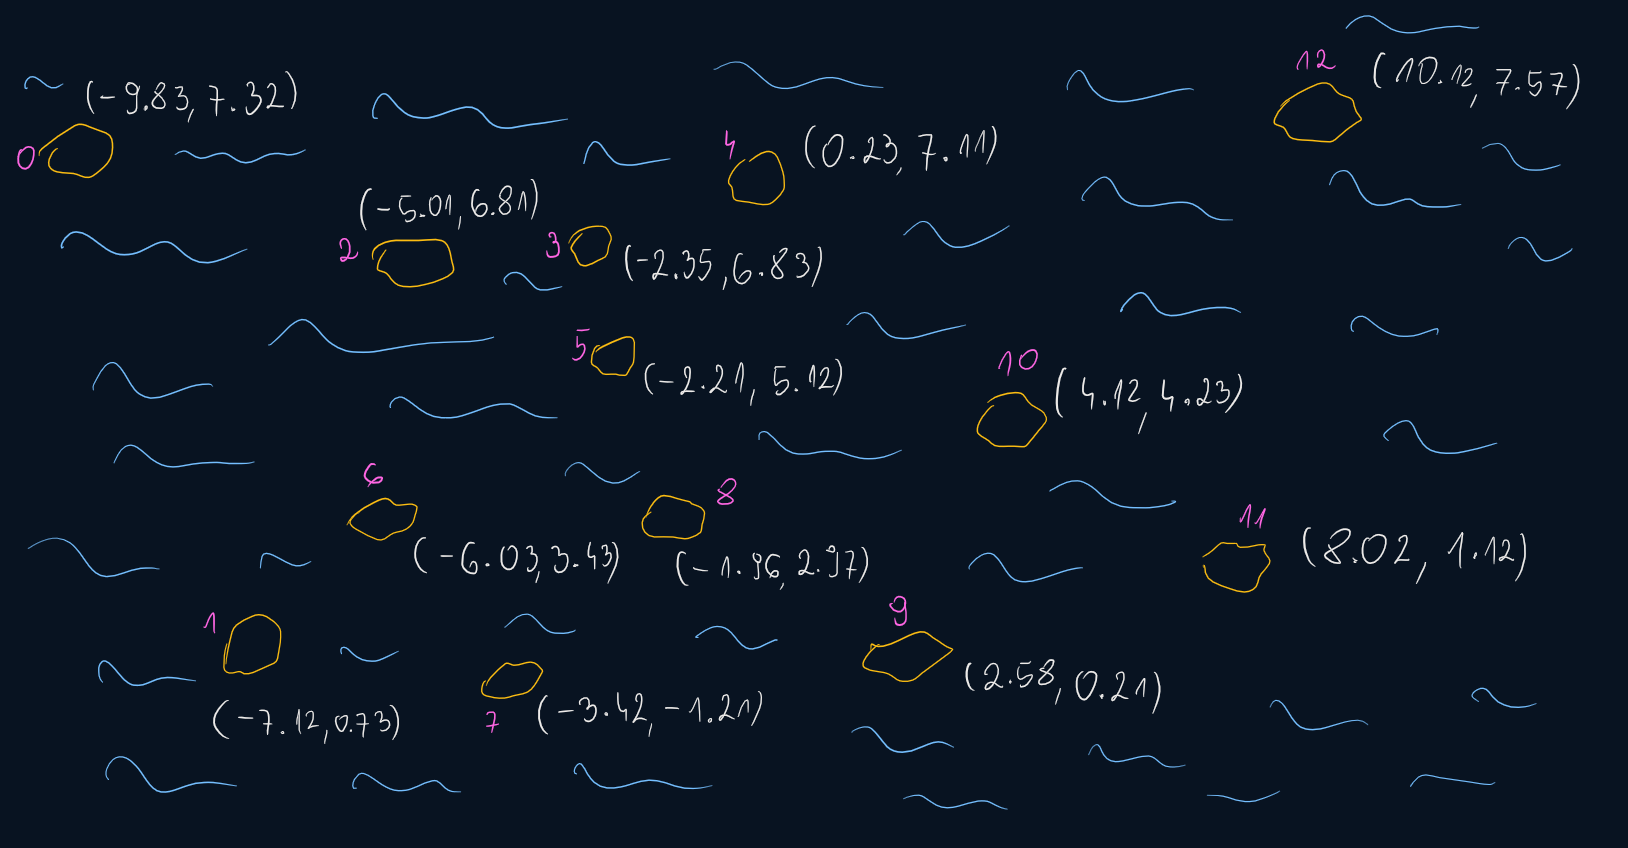

In [2]:
P = [(-9.83, 7.32), (-7.12, 0.73), (-5.01, 6.81), (-2.35, 6.83), (0.23, 7.11), (-2.21, 5.12), 
     (-6.03, 3.43), (-3.42, -1.21), (-1.96, 2.97), (2.58, 0.21), (4.12, 4.23), (8.02, 1.12), 
     (10.12, 7.57)]

In [3]:
Z = 5
start = (-9.83, 7.32)
end   = (8.02, 1.12)

days = count_days(P, start, end, Z)
print('Number of days:', days if days >= 0 else 'IMPOSSIBLE')

Number of days: 4


In [4]:
Z = 3
start = (-9.83, 7.32)
end   = (8.02, 1.12)

days = count_days(P, start, end, Z)
print('Number of days:', days if days >= 0 else 'IMPOSSIBLE')

Number of days: 8


In [5]:
Z = 2
start = (-9.83, 7.32)
end   = (8.02, 1.12)

days = count_days(P, start, end, Z)
print('Number of days:', days if days >= 0 else 'IMPOSSIBLE')

Number of days: IMPOSSIBLE


### (Dodatkowo) Otrzymywanie trasy
##### (Kolejno odwiedzanych wysp i dni odwiedzin)

In [6]:
from queue import Queue


def distance(p1, p2):
    return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** .5

    
def add_edge(G, u, v, weight):
    if weight == 1: 
        G[u].append(v)
        G[v].append(u)
        return
    
    w = len(G)  # added w vertex index
    for _ in range(weight - 1):
        G.append([])
        G[u].append(w)
        G[w].append(u)
        u = w
        w += 1
    
    w -= 1 
    G[w].append(v)
    G[v].append(w)
    
    
def create_graph(P: 'array of islands coordinates', target: 'target island', Z: 'max distance'):
    n = len(P)
    G = [[] for _ in range(n)]
    
    # Connect each island with islands that can be rached
    for u in range(n):
        for v in range(u):
            if u == v: continue
            dist = distance(P[u], P[v])
            if u == target or v == target:
                if dist <= 2 * Z: add_edge(G, u, v, 1)
            elif dist <= Z: add_edge(G, u, v, 1)
            elif dist <= 2 * Z: add_edge(G, u, v, 2)
        
    return G


def get_path(P: 'array of islands', s: 'start point', t: 'target point', Z: 'max distance'):
    if s == t: return 0
    
    # Create a graph of the islands
    G = create_graph(P, t, Z)
    n = len(G)
    
    # Find vertices representing start and end island
    start_u = end_u = -1
    for i in range(len(P)):
        if P[i] == s: start_u = i
        elif P[i] == t: end_u = i
    
    days = [-1] * n
    parents = [-1] * n
    days[start_u] = 0
    q = Queue()
    q.put(start_u)
    
    while not q.empty():
        u = q.get()
        if u == end_u: break
        for v in G[u]:
            # Visit if not visited
            if days[v] < 0:
                parents[v] = u
                days[v] = days[u] + 1
                q.put(v)
    # If a loop wasn't broken, there is no path
    else: return None, None
             
    path = restore_path(parents, start_u, end_u, len(P))
    return path, [days[i] for i in path]


def restore_path(parents, u, v, n):
    path = [v]
    while v != u:
        v = parents[v]
        # Check if it is a valid island or a sentinel one
        if v < n: path.append(v)
    path.reverse()
    return path

###### Kilka testów

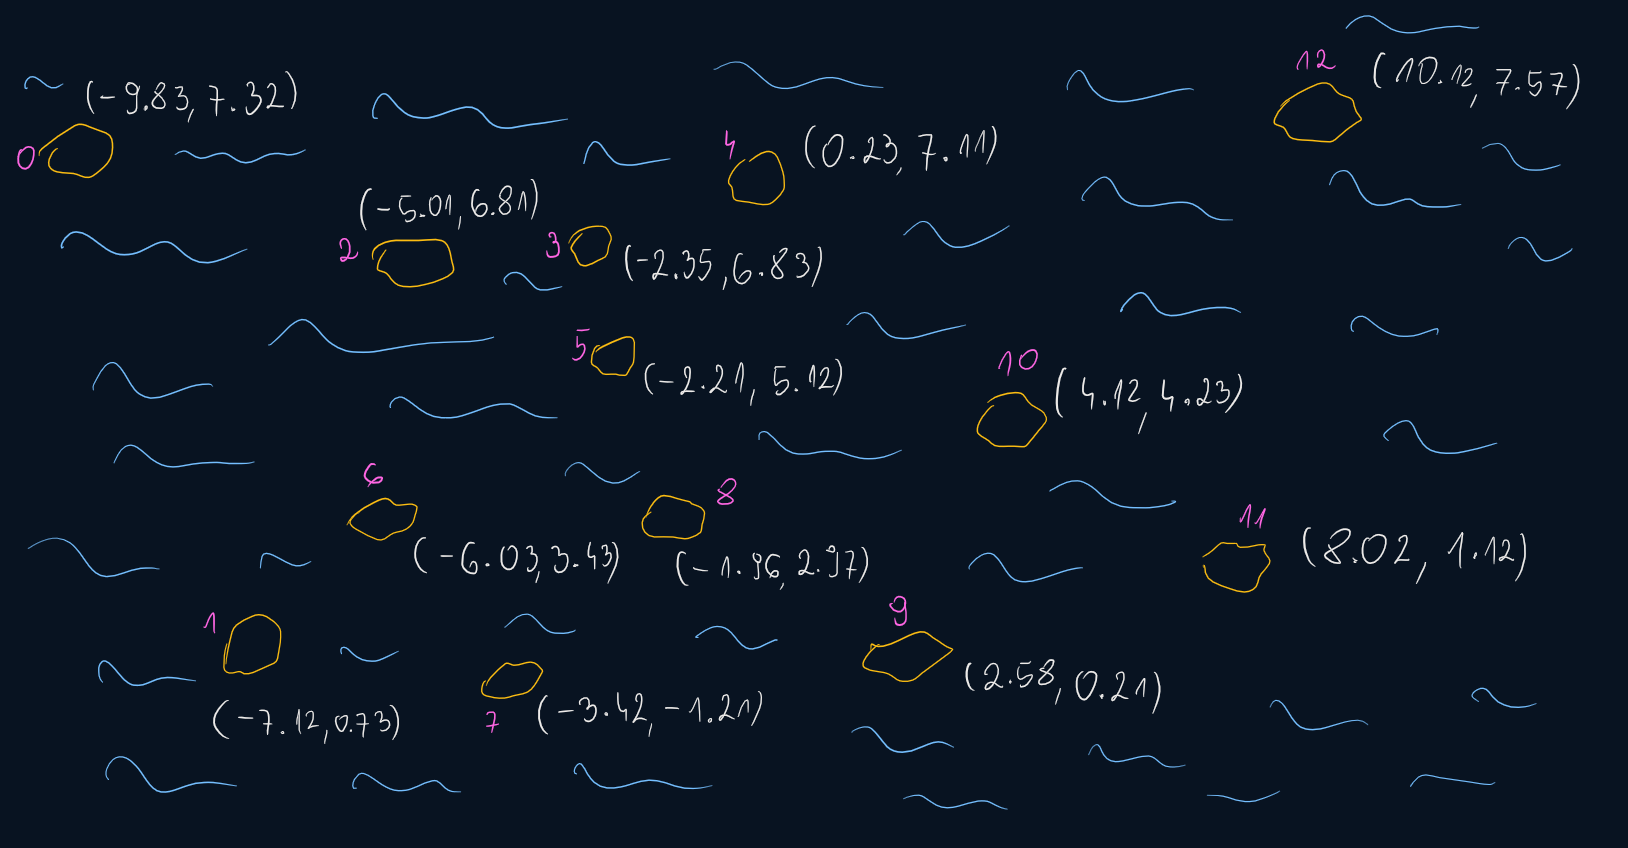

In [7]:
P = [(-9.83, 7.32), (-7.12, 0.73), (-5.01, 6.81), (-2.35, 6.83), (0.23, 7.11), (-2.21, 5.12), 
     (-6.03, 3.43), (-3.42, -1.21), (-1.96, 2.97), (2.58, 0.21), (4.12, 4.23), (8.02, 1.12), (10.12, 7.57)]

def swim(start, end, Z):
    path, days = get_path(P, start, end, Z)
    if not path:
        print('Impossible to reach the target')
    else:
        for p, day in zip(path, days):
            print(f'After {day} days: island {p} (coordinates: {P[p]})')

In [8]:
swim((-9.83, 7.32), (4.12, 4.23), 2.5)

After 0 days: island 0 (coordinates: (-9.83, 7.32))
After 2 days: island 2 (coordinates: (-5.01, 6.81))
After 4 days: island 3 (coordinates: (-2.35, 6.83))
After 6 days: island 4 (coordinates: (0.23, 7.11))
After 8 days: island 10 (coordinates: (4.12, 4.23))


In [9]:
swim((-9.83, 7.32), (8.02, 1.12), 5)

After 0 days: island 0 (coordinates: (-9.83, 7.32))
After 1 days: island 2 (coordinates: (-5.01, 6.81))
After 3 days: island 10 (coordinates: (4.12, 4.23))
After 4 days: island 11 (coordinates: (8.02, 1.12))


In [10]:
swim(P[1], P[12], 3.5)

After 0 days: island 1 (coordinates: (-7.12, 0.73))
After 2 days: island 5 (coordinates: (-2.21, 5.12))
After 4 days: island 10 (coordinates: (4.12, 4.23))
After 6 days: island 12 (coordinates: (10.12, 7.57))


In [11]:
swim(P[1], P[12], 3.35)

Impossible to reach the target


# Sposób II
### Z wrzucaniem wierzchołków kilka razy do kolejki
##### (Dużo łatwiejszy sposób w implementacji oraz mniej pamięci)

### Omówienie algorytmu

Kilka słów o tym, jak to powinniśmy implementować:
<div>
    <video src="../video/BIT_spotkanie9_zadanie3.mp4" controls style="width: 100%; height: 100%; padding: 0; margin: 0 auto;"></video>
</div>

### Złożoność

###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

In [12]:
from queue import Queue


def distance(p1, p2):
    return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** .5

    
def create_graph(P: 'array of islands coordinates', target: 'target island', Z: 'max distance'):
    n = len(P)
    G = [[] for _ in range(n)]
    
    # Connect each island with islands that can be rached
    for u in range(n):
        for v in range(n):
            if u == v: continue
            dist = distance(P[u], P[v])
            if u == target or v == target:
                if dist <= 2 * Z: G[u].append((v, 1))
            elif dist <= Z: G[u].append((v, 1))
            elif dist <= 2 * Z: G[u].append((v, 2))
        
    return G


def count_days(P: 'array of islands', s: 'start point', t: 'target point', Z: 'max distance'):
    if s == t: return 0
    
    # Create a graph of the islands
    G = create_graph(P, t, Z)
    n = len(G)
    
    # Find vertices representing start and end island
    start_u = end_u = -1
    for i in range(len(P)):
        if P[i] == s: start_u = i
        elif P[i] == t: end_u = i
    
    days = [-1] * n
    q = Queue()
    q.put([start_u, 0, 0, 0])
    days[start_u] = 0
        
    while not q.empty():
        data = q.get()
        u = data[0]
        w = data[1]  # The remaining weight
        # Continue if was visited before
        if days[u] > 0: continue
        # If there is no remaining weight, we can mark a vertex as visited
        if not w:
            days[u] = days[data[3]] + data[2]  # data[2] - edge's weight, data[3] is parent
            # Return the result if reached the target
            if u == end_u: return days[end_u]
            # Look for the next neighbour to visit
            for v, weight in G[u]:
                if days[v] < 0: q.put([v, weight - 1, weight, u])
        # Decrease the remaining weight and add data again to the queue
        else:
            data[1] -= 1
            q.put(data)
        
    return -1  # If impossible

###### Kilka testów

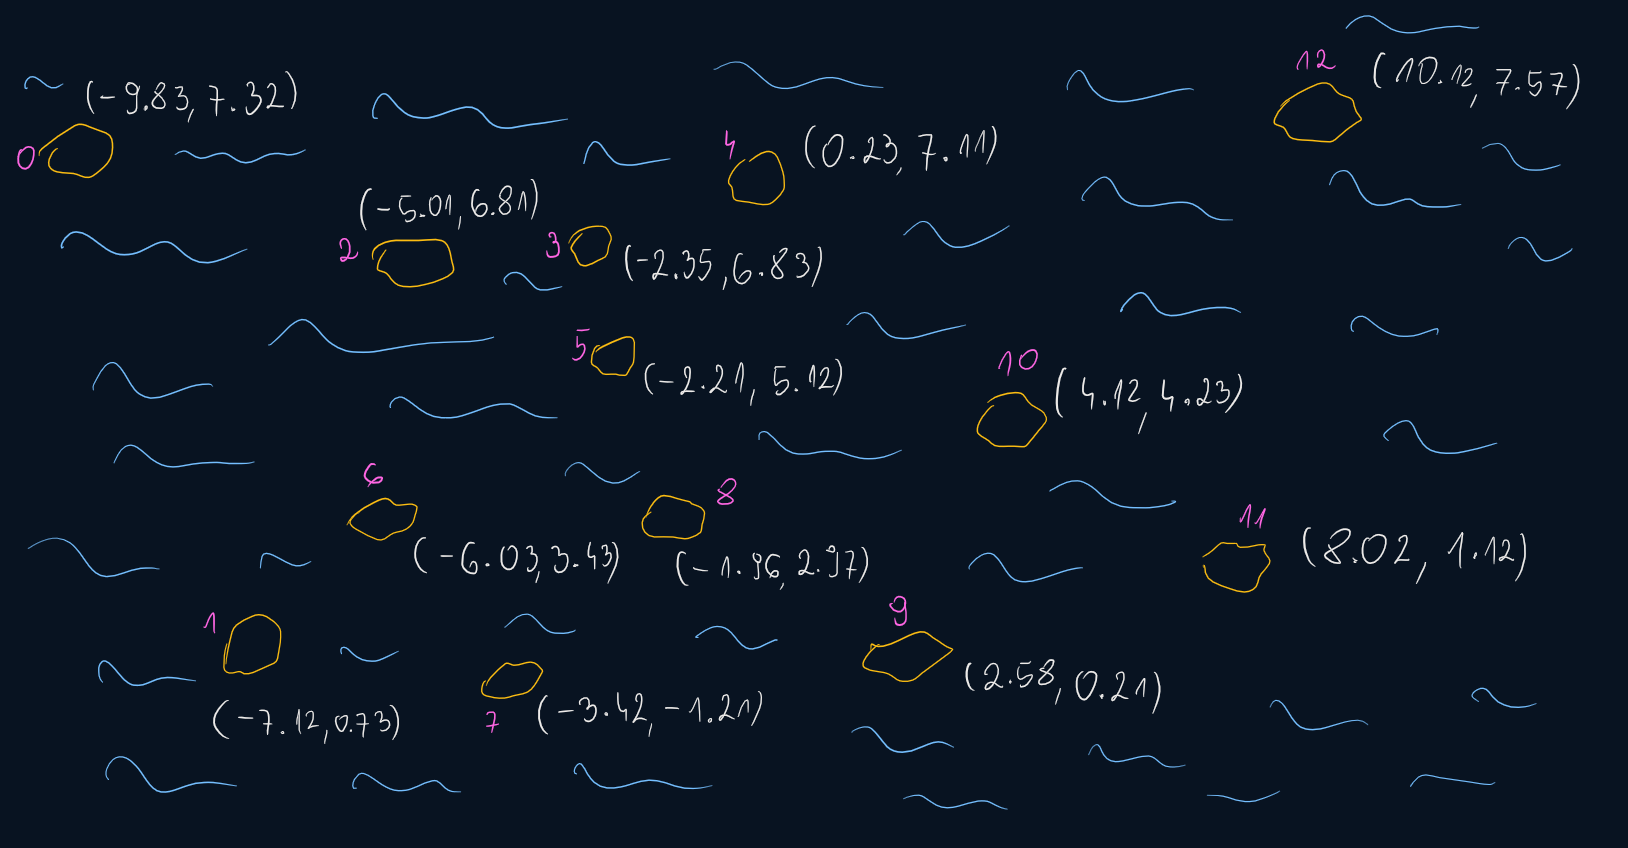

In [13]:
P = [(-9.83, 7.32), (-7.12, 0.73), (-5.01, 6.81), (-2.35, 6.83), (0.23, 7.11), (-2.21, 5.12), 
     (-6.03, 3.43), (-3.42, -1.21), (-1.96, 2.97), (2.58, 0.21), (4.12, 4.23), (8.02, 1.12), (10.12, 7.57)]

Z = 5
start = (-9.83, 7.32)
end   = (8.02, 1.12)

days = count_days(P, start, end, Z)
print('Number of days:', days if days >= 0 else 'IMPOSSIBLE')

Number of days: 4


### (Dodatkowo) Otrzymywanie trasy
##### (Kolejno odwiedzanych wysp i dni odwiedzin)

In [14]:
from queue import Queue


def distance(p1, p2):
    return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** .5

    
def create_graph(P: 'array of islands coordinates', target: 'target island', Z: 'max distance'):
    n = len(P)
    G = [[] for _ in range(n)]
    
    # Connect each island with islands that can be rached
    for u in range(n):
        for v in range(n):
            if u == v: continue
            dist = distance(P[u], P[v])
            if u == target or v == target:
                if dist <= 2 * Z: G[u].append((v, 1))
            elif dist <= Z: G[u].append((v, 1))
            elif dist <= 2 * Z: G[u].append((v, 2))
        
    return G


def get_path(P: 'array of islands', s: 'start point', t: 'target point', Z: 'max distance'):
    if s == t: return 0
    
    # Create a graph of the islands
    G = create_graph(P, t, Z)
    n = len(G)
    
    # Find vertices representing start and end island
    start_u = end_u = -1
    for i in range(len(P)):
        if P[i] == s: start_u = i
        elif P[i] == t: end_u = i
    
    days = [-1] * n
    parents = [-1] * n
    q = Queue()
    q.put([start_u, 0, 0, 0])
    days[start_u] = 0
        
    while not q.empty():
        data = q.get()
        u = data[0]
        w = data[1]  # The remaining weight
        # Continue if was visited before
        if days[u] > 0: continue
        # If there is no remaining weight, we can mark a vertex as visited
        if not w:
            days[u] = days[data[3]] + data[2]  # data[2] - edge's weight, data[3] is parent
            parents[u] = data[3]
            # Return the result if reached the target
            if u == end_u: break
            # Look for the next neighbour to visit
            for v, weight in G[u]:
                if days[v] < 0: q.put([v, weight - 1, weight, u])
        # Decrease the remaining weight and add data again to the queue
        else:
            data[1] -= 1
            q.put(data)
    # If a loop wasn't broken, there is no path
    else: return None, None
        
    path = restore_path(parents, start_u, end_u, len(P))
    return path, [days[i] for i in path]


def restore_path(parents, u, v, n):
    path = [v]
    while v != u:
        v = parents[v]
        # Check if it is a valid island or a sentinel one
        if v < n: path.append(v)
    path.reverse()
    return path

###### Kilka testów

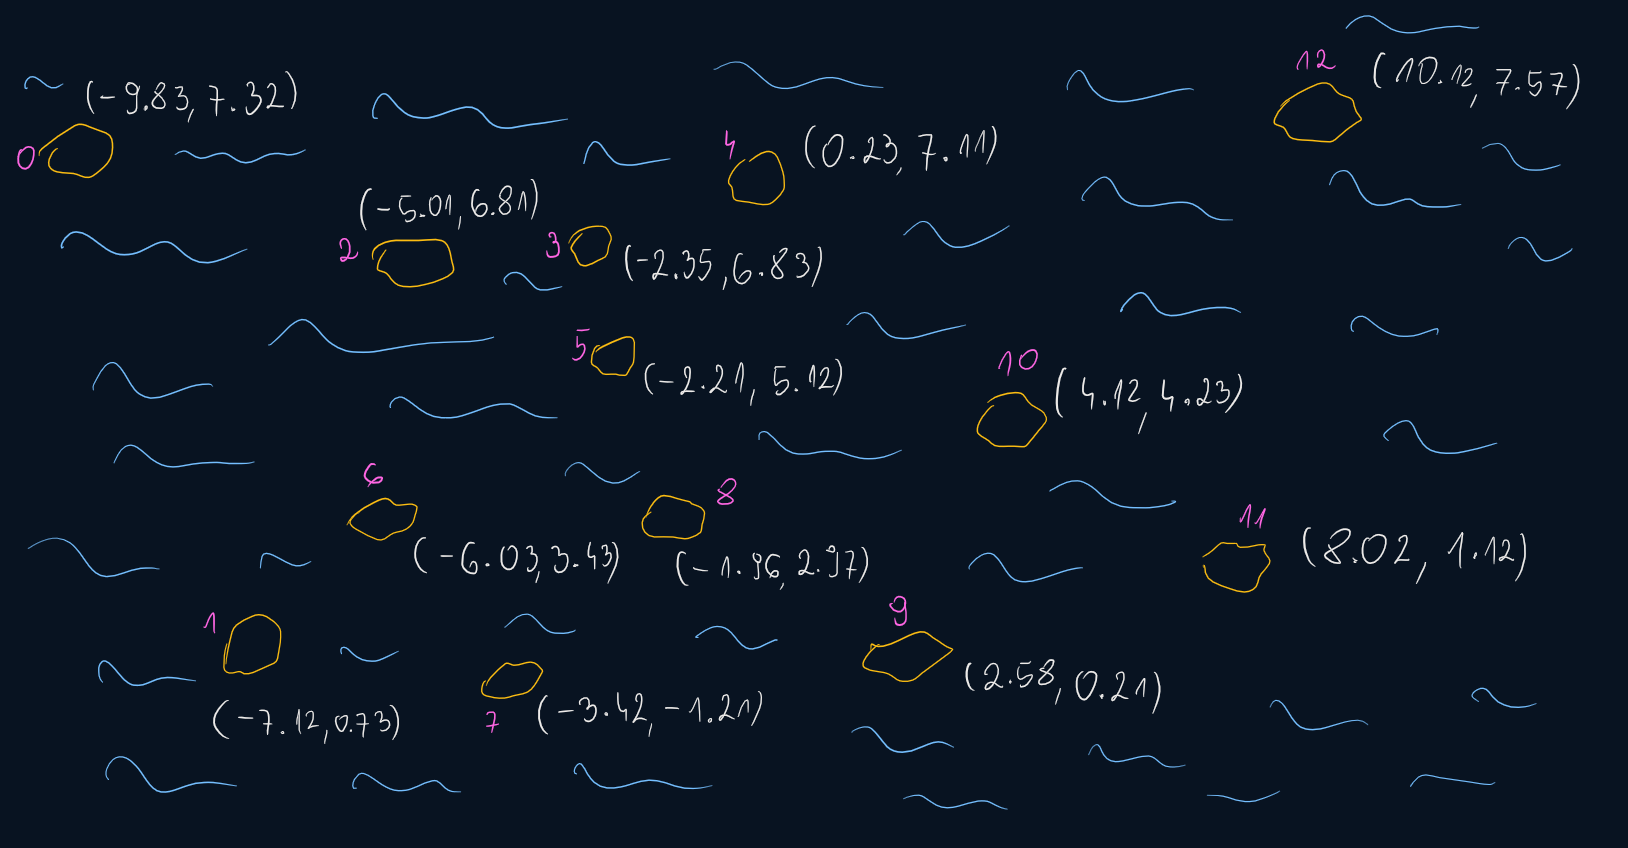

In [15]:
P = [(-9.83, 7.32), (-7.12, 0.73), (-5.01, 6.81), (-2.35, 6.83), (0.23, 7.11), (-2.21, 5.12), 
     (-6.03, 3.43), (-3.42, -1.21), (-1.96, 2.97), (2.58, 0.21), (4.12, 4.23), (8.02, 1.12), (10.12, 7.57)]

def swim(start, end, Z):
    path, days = get_path(P, start, end, Z)
    if not path:
        print('Impossible to reach the target')
    else:
        for p, day in zip(path, days):
            print(f'After {day} days: island {p} (coordinates: {P[p]})')

In [16]:
swim((-9.83, 7.32), (4.12, 4.23), 2.5)

After 0 days: island 0 (coordinates: (-9.83, 7.32))
After 2 days: island 2 (coordinates: (-5.01, 6.81))
After 4 days: island 3 (coordinates: (-2.35, 6.83))
After 6 days: island 4 (coordinates: (0.23, 7.11))
After 8 days: island 10 (coordinates: (4.12, 4.23))


In [17]:
swim((-9.83, 7.32), (8.02, 1.12), 5)

After 0 days: island 0 (coordinates: (-9.83, 7.32))
After 1 days: island 2 (coordinates: (-5.01, 6.81))
After 3 days: island 10 (coordinates: (4.12, 4.23))
After 4 days: island 11 (coordinates: (8.02, 1.12))


In [18]:
swim(P[1], P[12], 3.5)

After 1 days: island 1 (coordinates: (-7.12, 0.73))
After 1 days: island 5 (coordinates: (-2.21, 5.12))
After 3 days: island 10 (coordinates: (4.12, 4.23))
After 5 days: island 12 (coordinates: (10.12, 7.57))


In [19]:
swim(P[1], P[12], 3.35)

Impossible to reach the target
